# SOLUTION FOR HOMEWORK 5

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# 1. Apply Linear Regression on give dataset and predict the output target variable (”quality”). Please plot all the necessary plots like input data, loss , predicted vs actual values in the plot [15 pts]

In [2]:
wineQualityDf = pd.read_csv('Problem1_winequality.csv')

print("Problem 1 Wine Quality Data Columns::: \n", wineQualityDf.columns)
print("Data head ::: \n", wineQualityDf.head())
print("Data Shape ::: \n", wineQualityDf.shape)

Problem 1 Wine Quality Data Columns::: 
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Data head ::: 
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0    

In [3]:
# Check nulls
wineQualityDf.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
wineQualityDf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


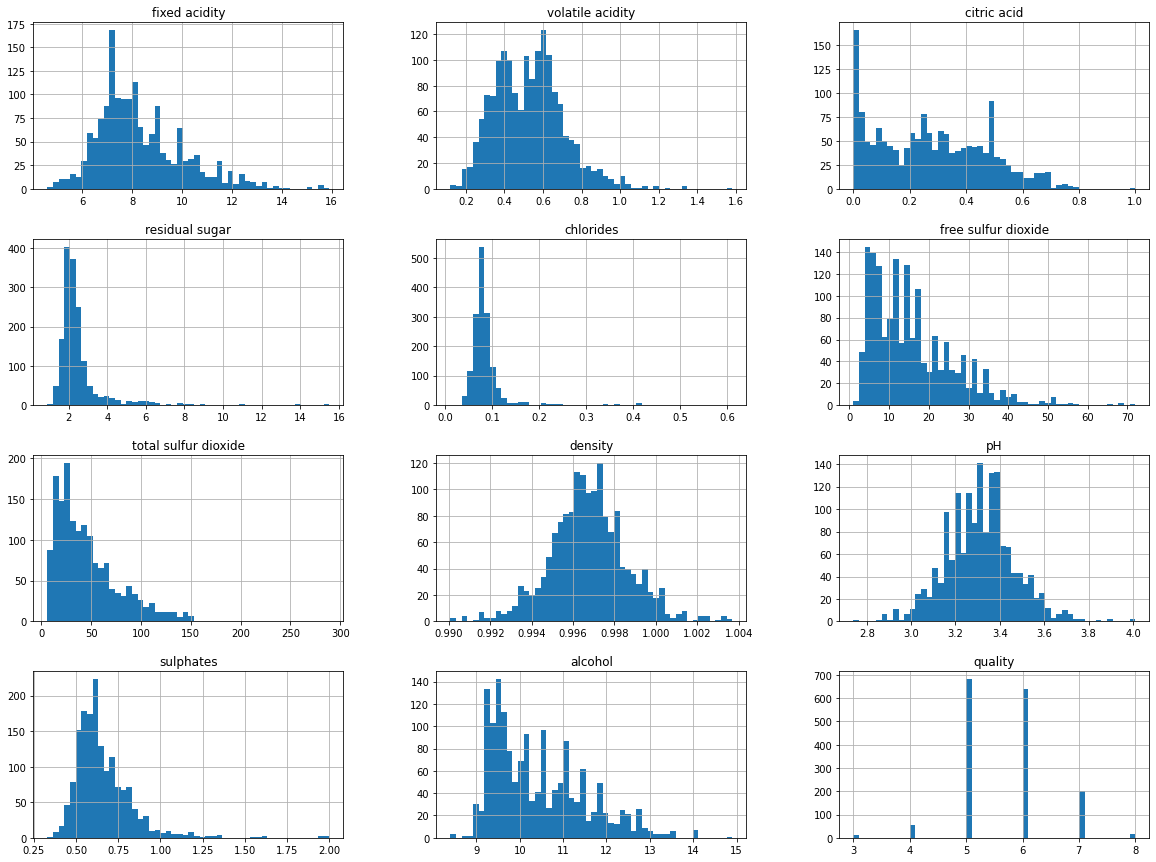

In [5]:
#plot input data
wineQualityDf.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
#input data correlation based on target feature
corr_matrix = wineQualityDf.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Correlation matrix::::
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxi

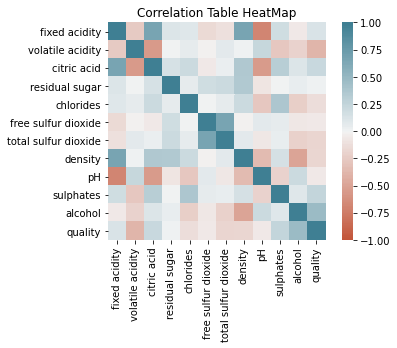

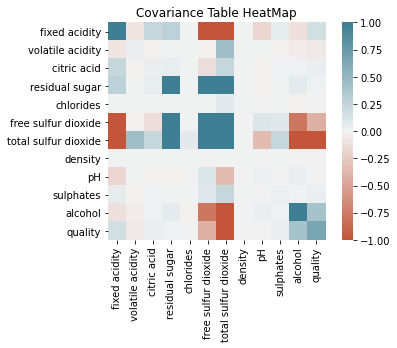

In [7]:
# Pairwise Covariance & Correlation tables
print("Correlation matrix::::")
print(wineQualityDf.corr())
print("\n Covariance matrix::::")
print(wineQualityDf.cov())

# Heat maps for Covariance & Correlation table
ax = sns.heatmap(
    wineQualityDf.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation Table HeatMap")
plt.show()

ax = sns.heatmap(
    wineQualityDf.cov(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Covariance Table HeatMap")
plt.show()

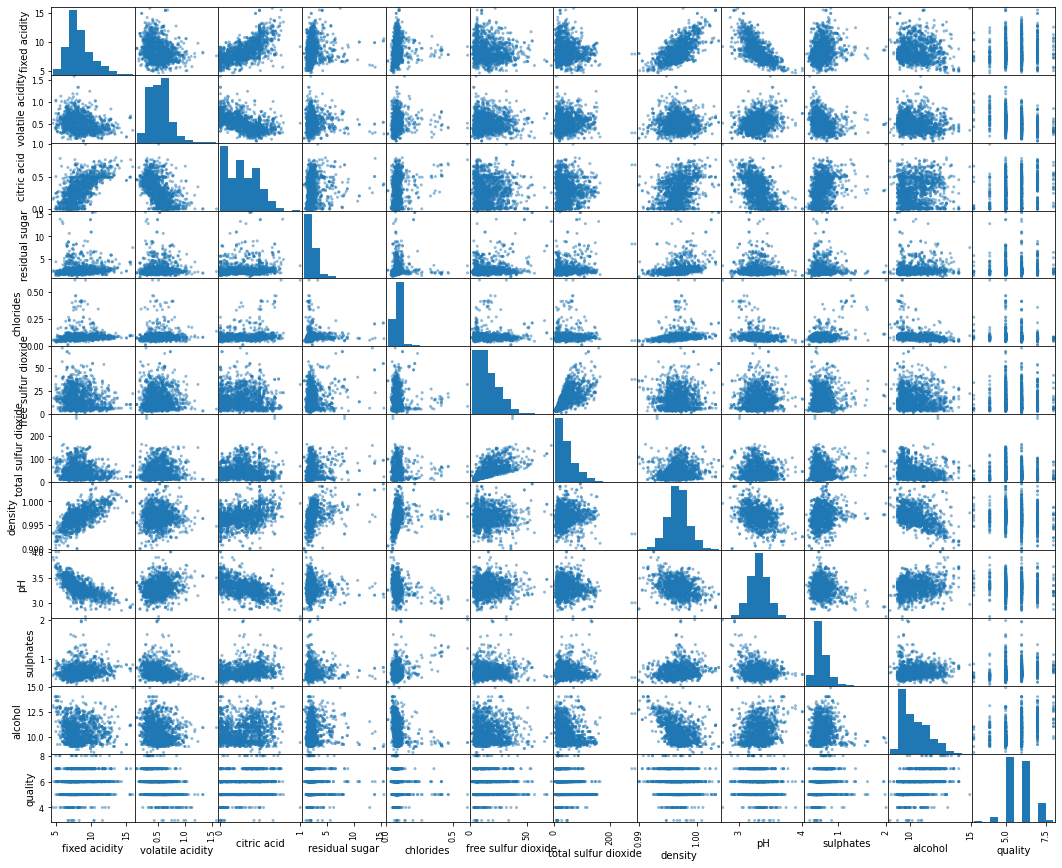

In [8]:
pd.plotting.scatter_matrix(wineQualityDf, figsize=(18, 15))
plt.show()

In [9]:
# Normalizing data with min-max normalization
x = wineQualityDf.iloc[:, :12].values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=[0, 3]) # normalization range [0,3]
x_scaled = min_max_scaler.fit_transform(x)
dataNormalizedDf = pd.DataFrame(x_scaled, columns=wineQualityDf.columns)
dataNormalizedDf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.743363,1.191781,0.00,0.205479,0.320534,0.422535,0.296820,1.702643,1.818898,0.413174,0.461538,1.2
1,0.849558,1.561644,0.00,0.349315,0.430718,1.014085,0.646643,1.482379,1.086614,0.628743,0.646154,1.2
2,0.849558,1.315068,0.12,0.287671,0.400668,0.591549,0.508834,1.526432,1.228346,0.574850,0.646154,1.2
3,1.752212,0.328767,1.68,0.205479,0.315526,0.676056,0.572438,1.746696,0.992126,0.449102,0.646154,1.8
4,0.743363,1.191781,0.00,0.205479,0.320534,0.422535,0.296820,1.702643,1.818898,0.413174,0.461538,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.424779,0.986301,0.24,0.226027,0.390651,1.309859,0.402827,1.063877,1.677165,0.449102,0.969231,1.2
1595,0.345133,0.883562,0.30,0.267123,0.250417,1.605634,0.477032,1.112335,1.842520,0.772455,1.292308,1.8
1596,0.451327,0.801370,0.39,0.287671,0.320534,1.183099,0.360424,1.248899,1.606299,0.754491,1.200000,1.8
1597,0.345133,1.078767,0.36,0.226027,0.315526,1.309859,0.402827,1.189427,1.960630,0.682635,0.830769,1.2


In [10]:
X = dataNormalizedDf.iloc[:, :-1].values
y = dataNormalizedDf['quality'].values

# Applying Stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print("Shape after split::", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# fit a model using Linear Regression
lm = LinearRegression()
lmmodel = lm.fit(X_train, y_train)
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

predictions = lm.predict(X_test)
scoreTrain = lmmodel.score(X_train, y_train)
scoreTest = lmmodel.score(X_test, y_test)

print("Linear Regression Model::: ")
print("scoreTrain=", scoreTrain)
print("scoreTest=", scoreTest)


Shape after split:: (1071, 11) (528, 11) (1071,) (528,)
Intercept: 
 1.6896932395485946
Coefficients: 
 [ 0.02072144 -0.33840696 -0.00520365  0.0700623  -0.26165746  0.02658243
 -0.17209677 -0.04291264 -0.10733747  0.31840472  0.34938879]
Linear Regression Model::: 
scoreTrain= 0.37639845469800104
scoreTest= 0.3092110067121955


In [11]:
# Mean Squared Error
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
print('RMSE: %.4f' % rmse)

RMSE: 0.3832


In [12]:
# Mean Absolute Error
mae = mean_absolute_error(predictions, y_test)
print('MAE: %.4f' % mae)

MAE: 0.2941


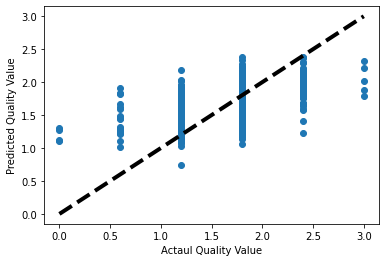

In [13]:
# Plot Actaul vs Predicted value
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Actaul Quality Value')
ax.set_ylabel('Predicted Quality Value')
plt.show()

# 2. Explainsomeoftheassumptionsfollowedintheparametricmethodsandnon-parametric methods? Please explain explain which method to use in which cases of the dataset. [10 Pts]

Parametric methods Assumptions:
1. In methods like 2-sample t test or One-Way ANOVA, equal variances is not assumed. It's good to use even when the data groups have different spreads.

2. Normal distribution of data:- If the sample size is large enough and the actual sample data point value are approximately normally distributed, then the central limit theorem ensures a normally distributed sampling distribution.

3. Homogeneity of variance:- Parametric methods need similarity in the variance throughout the data.

4. Interval data:- Data point values should be numerical variable and measured at interval level.

5. Independence:- Data point values for variables for different groups should be independent of each other.

Non-parametric methods Assumptions:
1. For nonparametric tests that compare groups, assumption is data for all groups must have the same spread (dispersion), else prediction results will not be valid.

2. The population data does not have a normal distribution.

When to use Parametric methods:
1. Parametric tests can perform well with skewed and nonnormal distributions.
2. Parametric tests can perform well when the spread of each group is different.
3. Parametric tests usually have more statistical power than nonparametric tests. 
4. Typical parametric tests can only assess continuous data and the results can be significantly affected by outliers. 
5. The assumptions for the population probability distribution hold true
6. The sample size is large enough for the central limit theorem to lead to normality of averages
7. The data is non-normal but can be transformed

When to use non-parametric methods:
1. Sample that is too small. 
2. Very small sample size.
3. When data may not be normally distributed.
4. For ordinal data, ranked data, or outliers that can’t be removed.

# 3. Explain in detail about how logistic regression has been derived from Bernoulli distri- bution and when to apply logistic regression instead of linear regression ? [10 Pts]

1. Probability mass function of a bernoulli random variable 𝑋 with parameter 𝜋  and then introducing the exponential function
                𝑝(𝑥;𝜋) = (𝜋^𝑥)((1−𝜋)^1−𝑥)
                       = exp(𝑥log(𝜋)+(1−𝑥)log(1−𝜋))
                       = exp(𝑥log(𝜋/1−𝜋)+log(1−𝜋))
                       
From the above, this is in the form of exponential family with statistic 𝑥 and parameter log(𝜋/1−𝜋) .

Making the transformation 𝜃=log(𝜋1−𝜋) to get the form 𝑝(𝑥;𝜃)=exp(𝑥𝜃−𝑐(𝜃)). 
This new function is the logit function. 

The inverse relationship function we obtain the logistic transformation
        𝜋=1/1+exp(−𝜃)
The logistic function rises from the Bernoulli distribution.

1. Linear regression uses ordinary least squares method to minimise the errors and arrive at a best possible fit, while logistic regression uses maximum likelihood method to arrive at the solution.
2. Linear regression is usually solved by minimizing the least squares error of the model to the data, therefore large errors occur. While Logistic regression is just the opposite. Using the logistic loss function causes large errors to be penalized to an asymptotically constant.
3. Logistic regression models the probability of the membership to a particular group or category without directly modeling the values of the dependent variable. If the dependent variable consists of only two categories, logistic regression estimates the odds outcome of the dependent variable given a set of quantitative and/or categorical independent variables.
4. Linear Regression is used for predicting continuous variables. While Logistic Regression is used for predicting variables which has only limited values.

-- Multinomial Logistic Regression is used to classify subjects into groups based on a categorical range of variables to predict behavior.
--Binary Logistic Regression is most useful when you want to model the event probability for a categorical response variable with two outcomes.

# 4. Do the required exploratory data analysis and appply Logistic regression on the given dataset ? The output should have your code, plots and below following values at the end (15 Pts for Exploratory data analysis and plots ,15 points for the rest of the algorithm )[30 Pts]
The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = The Missclassification = 1-Accuracy =
Sensitivity or True Positive Rate = TP/(TP+FN) = Specificity or True Negative Rate = TN/(TN+FP) =
Positive Predictive value = TP/(TP+FP) =
Negative predictive Value = TN/(TN+FN) =
Positive Likelihood Ratio = Sensitivity/(1-Specificity) = Negative likelihood Ratio = (1-Sensitivity)/Specificity =

In [14]:
problem4Df = pd.read_csv('problem4.csv')

print("Problem 4 Data Columns::: \n", problem4Df.columns)
print("Data head ::: \n", problem4Df.head())
print("Data Shape ::: \n", problem4Df.shape)

Problem 4 Data Columns::: 
 Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
Data head ::: 
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2         

In [15]:
# Check nulls
problem4Df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [16]:
# Fill missing values with 0
problem4Df['education']=problem4Df['education'].fillna(0)
problem4Df['cigsPerDay']=problem4Df['cigsPerDay'].fillna(0)
problem4Df['BPMeds']=problem4Df['BPMeds'].fillna(0)
problem4Df['totChol']=problem4Df['totChol'].fillna(0)
problem4Df['BMI']=problem4Df['BMI'].fillna(0)
problem4Df['heartRate']=problem4Df['heartRate'].fillna(0)
problem4Df['glucose']=problem4Df['glucose'].fillna(0)
problem4Df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [17]:
problem4Df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.930425,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,233.908255,132.354599,82.897759,25.685184,75.861085,74.463208,0.151887
std,0.495027,8.572942,1.053026,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,51.166237,22.033300,11.910394,4.420501,12.080265,32.862256,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.050000,68.000000,68.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


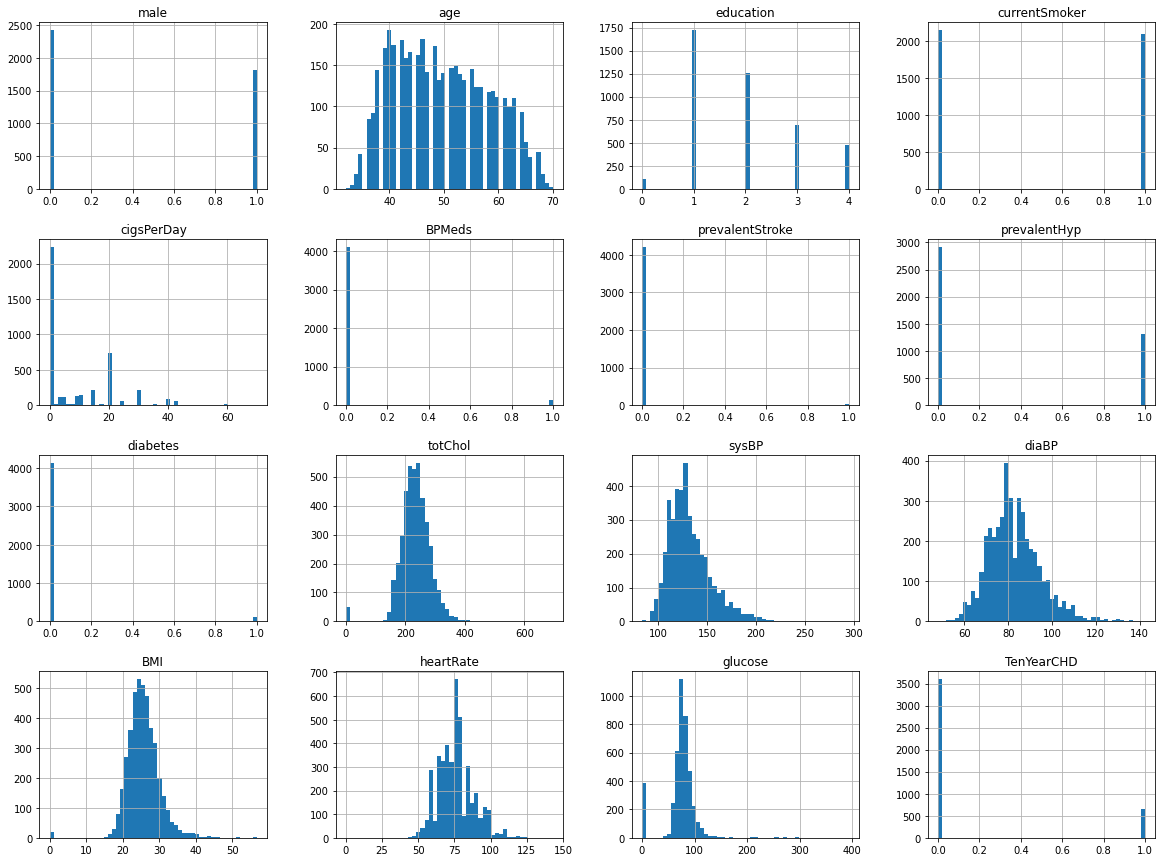

In [18]:
problem4Df.hist(bins=50, figsize=(20,15))
plt.show()

Correlation matrix::::
                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.029014   0.009335       0.197026    0.314849   
age             -0.029014  1.000000  -0.162875      -0.213662   -0.192017   
education        0.009335 -0.162875   1.000000       0.020054    0.012111   
currentSmoker    0.197026 -0.213662   0.020054       1.000000    0.760326   
cigsPerDay       0.314849 -0.192017   0.012111       0.760326    1.000000   
BPMeds          -0.051544  0.121011  -0.009801      -0.048348   -0.044697   
prevalentStroke -0.004550  0.057679  -0.030020      -0.032980   -0.032248   
prevalentHyp     0.005853  0.306799  -0.074725      -0.103710   -0.065541   
diabetes         0.015693  0.101314  -0.037389      -0.044285   -0.036173   
totChol         -0.028817  0.213756  -0.013442      -0.053773   -0.035450   
sysBP           -0.035879  0.394053  -0.121313      -0.130281   -0.088393   
diaBP            0.058199  0.205586  -0.061932      -

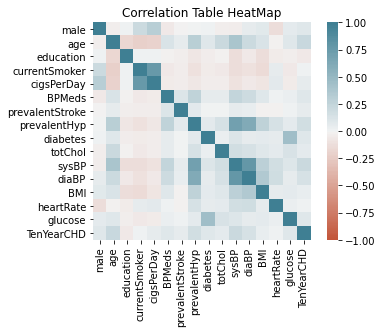

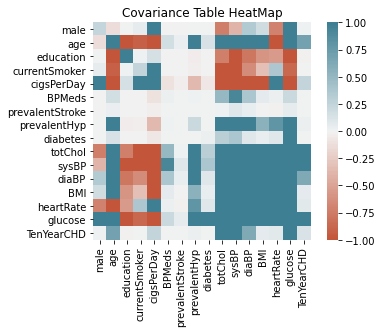

In [19]:
# Pairwise Covariance & Correlation tables
print("Correlation matrix::::")
print(problem4Df.corr())
print("\n Covariance matrix::::")
print(problem4Df.cov())

# Heat maps for Covariance & Correlation table
ax = sns.heatmap(
    problem4Df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation Table HeatMap")
plt.show()

ax = sns.heatmap(
    problem4Df.cov(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Covariance Table HeatMap")
plt.show()

In [20]:
X = problem4Df.iloc[:, :-1].values
y = problem4Df['TenYearCHD'].values

# Applying Stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print("Shape after split::", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# Predict
y_pred=logreg.predict(X_test)

scoreTrain = logreg.score(X_train, y_train)
scoreTest = logreg.score(X_test, y_test)
print("Logistic Regression Model::: ")
print("scoreTrain=", scoreTrain)
print("scoreTest=", scoreTest)


Shape after split:: (2840, 15) (1400, 15) (2840,) (1400,)
Logistic Regression Model::: 
scoreTrain= 0.85
scoreTest= 0.8528571428571429


In [21]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1183,    6],
       [ 200,   11]])

Text(0.5, 1.1, 'Confusion matrix')

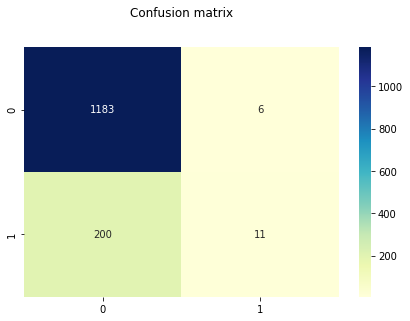

In [22]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8528571428571429
Precision: 0.6470588235294118
Recall: 0.052132701421800945


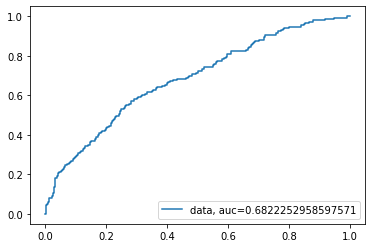

In [24]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [25]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[0,1]
FN = cnf_matrix[1,0]
TN = cnf_matrix[1,1]
print('TP - True Positive', TP)
print('FP - False Positive', FP)
print('FN - False Negative', FN)
print('TN - True Negative', TN)

TP - True Positive 1183
FP - False Positive 6
FN - False Negative 200
TN - True Negative 11


In [26]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
misclassification = format(1 - accuracy)
Sensitivity = TP/(TP+FN)
Specificity = TN/(TN+FP)
PositivePredictiveValue = TP/(TP+FP)
NegativePredictiveValue = TN/(TN+FN)
PositiveLikelihoodRatio = Sensitivity/(1-Specificity)
NegativeLikelihoodRatio = (1-Sensitivity)/Specificity
print("Accuracy = ", accuracy)
print("Misclassification = ", misclassification)
print("Sensitivity = ", Sensitivity)
print("Positive Predictive Value = ", PositivePredictiveValue)
print("Negative Predictive Value = ", NegativePredictiveValue)
print("Positive Likelihood Ratio = ", PositiveLikelihoodRatio)
print("Negative Likelihood Ratio = ", NegativeLikelihoodRatio)

Accuracy =  0.8528571428571429
Misclassification =  0.14714285714285713
Sensitivity =  0.8553868402024585
Positive Predictive Value =  0.9949537426408747
Negative Predictive Value =  0.052132701421800945
Positive Likelihood Ratio =  2.423596047240299
Negative Likelihood Ratio =  0.22349306514165507


# 5. Apply Cross validation on the above Logistic regression and comment on the change in accuracy [5 pts].

In [27]:
# Perform 10-fold cross validation
scores = cross_val_score(logreg, X, y, cv=10)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.85849057 0.85141509 0.85141509 0.8490566  0.8490566  0.84433962
 0.84669811 0.8490566  0.8490566  0.84433962]


Accuracy of Logistic Regression model was 85.85%. On performing 10-fold cross validation, accuracies range from 84.66% to 86.28%. There's no much difference in accuracies between Logistic regression and Cross validation resampling.

# 6. a) Appply Support Vector Classifier on the given dataset ? The output should have your code, plots, accuracy, precision, recall, f1-score. b) Use different kernel methods available (Signmoid, Gaussian, Polynomial) in the SVM and comment on the accuracy and performance using different kernels.
(15 pts part a , 15 points for part b )[30 Pts]

In [28]:
problem6Df = pd.read_csv('problem6.csv')

print("Problem 6 Data Columns::: \n", problem6Df.columns)
print("Data head ::: \n", problem6Df.head())
print("Data Shape ::: \n", problem6Df.shape)

Problem 6 Data Columns::: 
 Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')
Data head ::: 
    Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
Data Shape ::: 
 (1372, 5)


In [29]:
# Check nulls
problem6Df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [30]:
problem6Df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


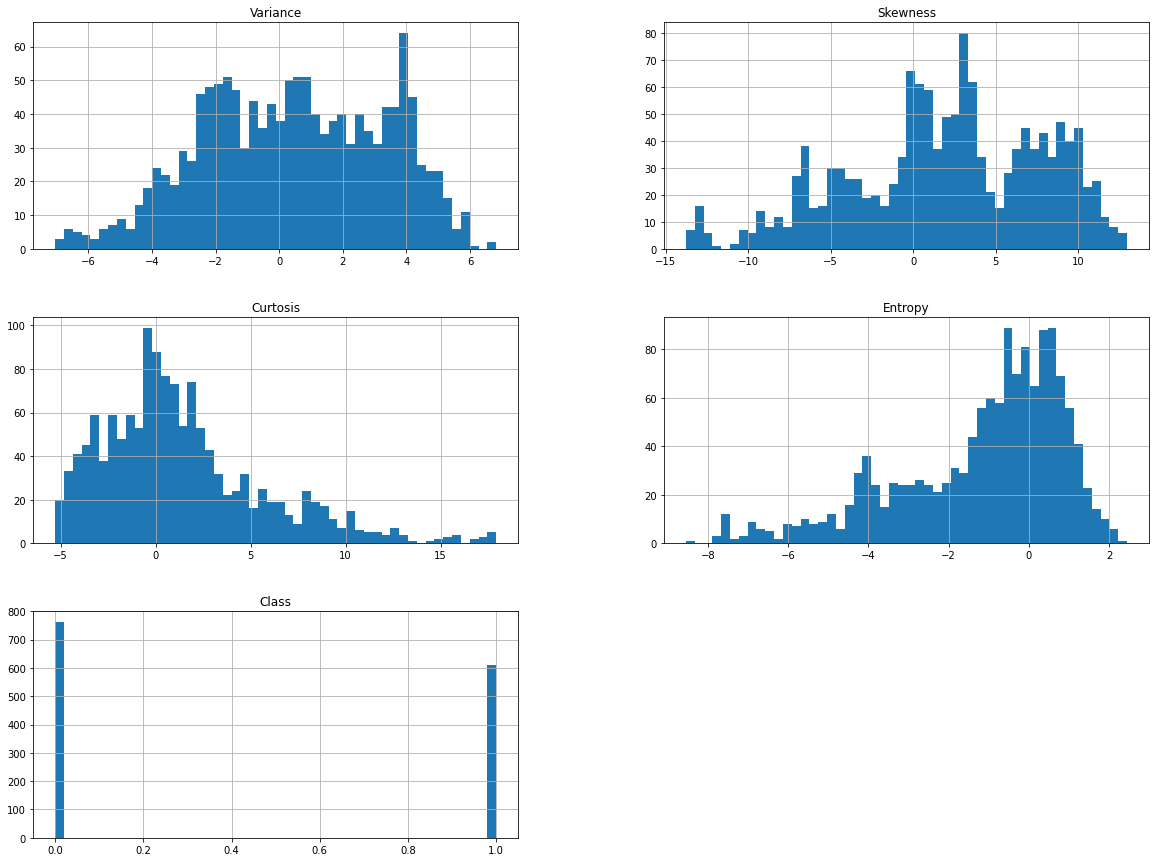

In [31]:
problem6Df.hist(bins=50, figsize=(20,15))
plt.show()

Correlation matrix::::
          Variance  Skewness  Curtosis   Entropy     Class
Variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
Skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
Curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
Entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
Class    -0.724843 -0.444688  0.155883 -0.023424  1.000000

 Covariance matrix::::
          Variance   Skewness   Curtosis   Entropy     Class
Variance  8.081299   4.405083  -4.666323  1.653338 -1.024310
Skewness  4.405083  34.445710 -19.905119 -6.490033 -1.297386
Curtosis -4.666323 -19.905119  18.576359  2.887241  0.333985
Entropy   1.653338  -6.490033   2.887241  4.414256 -0.024464
Class    -1.024310  -1.297386   0.333985 -0.024464  0.247112


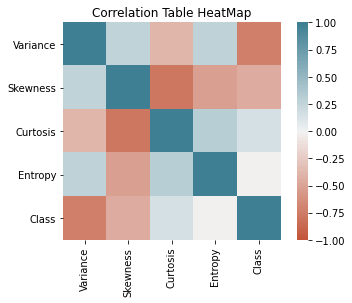

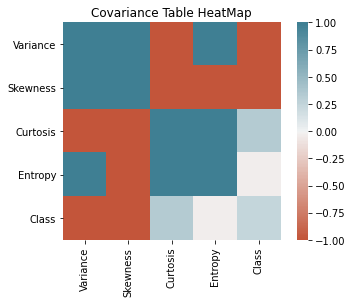

In [32]:
# Pairwise Covariance & Correlation tables
print("Correlation matrix::::")
print(problem6Df.corr())
print("\n Covariance matrix::::")
print(problem6Df.cov())

# Heat maps for Covariance & Correlation table
ax = sns.heatmap(
    problem6Df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlation Table HeatMap")
plt.show()

ax = sns.heatmap(
    problem6Df.cov(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Covariance Table HeatMap")
plt.show()

In [33]:
X = problem6Df.iloc[:, :-1]
y = problem6Df['Class']

# Applying Stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print("Shape after split::", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape after split:: (919, 4) (453, 4) (919,) (453,)


In [34]:
# SVC 'linear'
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

print ('Linear Kernel Performance')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Linear Kernel Performance
[[247   6]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       253
           1       0.97      1.00      0.99       200

    accuracy                           0.99       453
   macro avg       0.99      0.99      0.99       453
weighted avg       0.99      0.99      0.99       453



In [35]:
# SVC 'polynomial'
poly_svclassifier = SVC(kernel='poly', degree=20)
poly_svclassifier.fit(X_train, y_train)
poly_y_pred = poly_svclassifier.predict(X_test)

print ('Polynomial Kernel Performance')
print(confusion_matrix(y_test, poly_y_pred))
print(classification_report(y_test, poly_y_pred))

Polynomial Kernel Performance
[[248   5]
 [130  70]]
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       253
           1       0.93      0.35      0.51       200

    accuracy                           0.70       453
   macro avg       0.79      0.67      0.65       453
weighted avg       0.78      0.70      0.66       453



In [36]:
# SVC Gaussian Kernal
g_svclassifier = SVC(kernel='rbf')
g_svclassifier.fit(X_train, y_train)
g_y_pred = g_svclassifier.predict(X_test)

print ('Gussain Kernel Performance')
print(confusion_matrix(y_test, g_y_pred))
print(classification_report(y_test, g_y_pred))

Gussain Kernel Performance
[[252   1]
 [  0 200]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       200

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [37]:
# SVC Sigmoid
sig_svclassifier = SVC(kernel='sigmoid')
sig_svclassifier.fit(X_train, y_train)
sig_y_pred = sig_svclassifier.predict(X_test)

print ('Sigmoid Kernel Performance')
print(confusion_matrix(y_test, sig_y_pred))
print(classification_report(y_test, sig_y_pred))

Sigmoid Kernel Performance
[[182  71]
 [ 73 127]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.72       253
           1       0.64      0.64      0.64       200

    accuracy                           0.68       453
   macro avg       0.68      0.68      0.68       453
weighted avg       0.68      0.68      0.68       453



Precision of SVC with 'linear' kernal gave precision of 1.00 and recall 0.98, giving accuracy of 0.99. Whereas, SVC with 'sigmoid' kernal gave a precision of 0.63, 0.52 for class labels 0,1 respectively. Accuracy of 'sigmoid' kenal SVC os just 57%. 

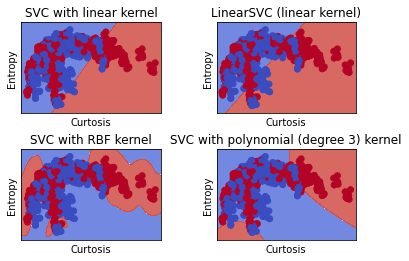

In [38]:
X = X_train[['Curtosis','Entropy']]
X = X.to_numpy()
y = y_train
y = y.to_numpy()

h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Curtosis')
    plt.ylabel('Entropy')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

# THANK YOU